# TopicTrackerDemo

In [2]:
library(igraph)
library(hash)
library(plotrix)
library(formattable)

In [3]:
# Read topicTracker.R that contains two main fuctions: buildTES() and visualiseTES
source("./topicTracker.R")
in_dir = "../data/"
out_dir = "../output/"

## Read Example Input Data

In [4]:
# Read temporal topic profile
P <- read.csv(paste0(in_dir, "/softwarex_example_topic_profile.csv"), head=TRUE, as.is=TRUE)
P$date <- as.Date(paste0(P$year, '-01-01'))

# Read TES (Topic Evolutionary Strength) Matrix
TES_M <- read.csv(paste0(in_dir, "/softwarex_example_tes_matrix.csv"), header=F, check.names = F, sep=",", as.is=TRUE)
n = nrow(TES_M)
TES_M = as.matrix(TES_M, rownames=F)
rownames(TES_M) = P$id
colnames(TES_M) = P$id

## Building TET (Topic Evolution Tree)

In [5]:
tracked_topics = buildTES(x=TES_M, P, best=c("max"), min_tes=0.2)

In [6]:
tracked_topics

child.name,ances.name,child,ances,weight,child.date,ances.date,label,child.word
<fct>,<fct>,<int>,<int>,<dbl>,<dttm>,<dttm>,<fct>,<fct>
t1,NA,1,NA,0.00,2001-01-01,NA,A,"['opinion', 'computer', 'lab', 'user', 'human']"
t2,NA,2,NA,0.00,2001-01-01,NA,B,"['time', 'lab', 'opinion', 'human', 'computer']"
t3,t2,3,2,0.30,2002-01-01,2001-01-01,C,"['time', 'application', 'interface', 'user', 'computer']"
t4,t2,4,2,0.50,2002-01-01,2001-01-01,D,"['lab', 'user', 'abc', 'interface', 'application']"
t5,t1,5,1,0.10,2002-01-01,2001-01-01,E,"['application', 'interface', 'abc', 'opinion', 'computer']"
t6,t1,6,1,0.90,2003-01-01,2001-01-01,F,"['interface', 'computer', 'application', 'response', 'system']"
t6,t5,6,5,0.20,2003-01-01,2002-01-01,F,"['interface', 'computer', 'application', 'response', 'system']"
t6,t4,6,4,0.90,2003-01-01,2002-01-01,F,"['interface', 'computer', 'application', 'response', 'system']"
t7,t5,7,5,0.30,2003-01-01,2002-01-01,G,"['lab', 'abc', 'survey', 'opinion', 'time']"


## Visualising TET

mgp:

The first value in mgp is where your axis labels moves either close to or far from axis, less value means closer to axis and high value means far from axis on both the axis i.e. x and y axis.

The second value in mgp is where your tick labels moves either close to or far from ticks, less value means closer to tick and high value means far from ticks on both the axis i.e. x and y axis.

The third value in mgp is where your ticks moves either close to or far from axis line itself, less value means closer to axis line and high value means far from axis line on both the axis, i.e. x and y.

mar is a numerical vector of the form c(bottom, left, top, right) which gives the number of lines of margin to be specified on the four sides of the plot. The default is c(5, 4, 4, 2) + 0.1

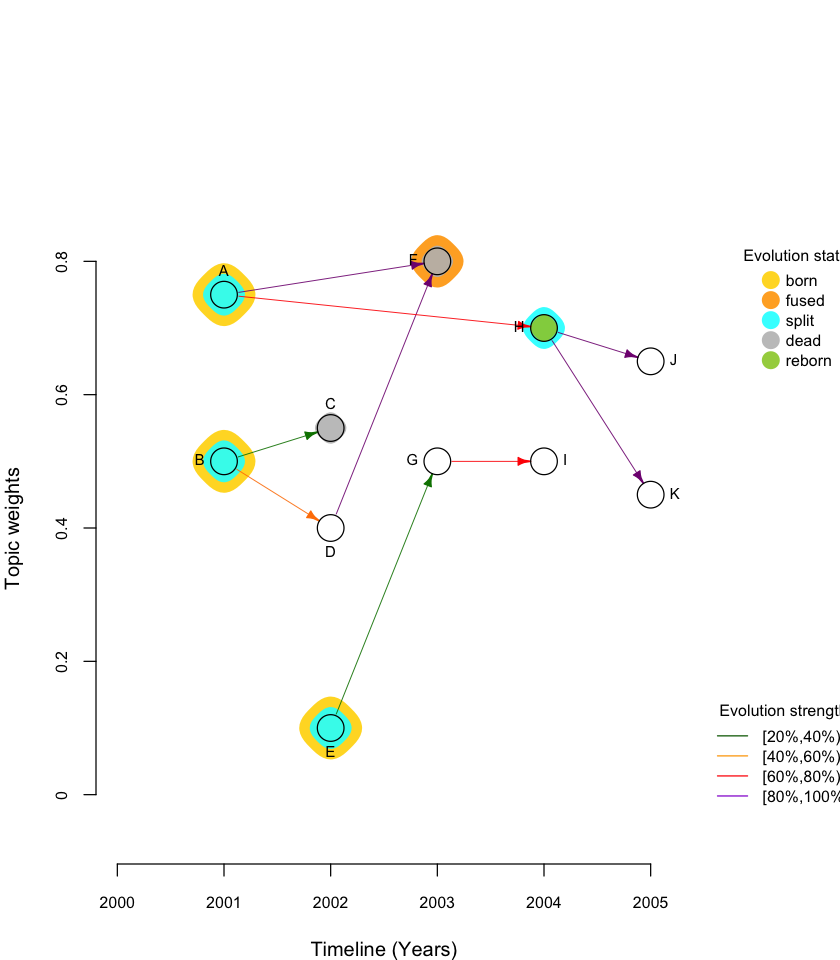

In [10]:
options(repr.plot.width=7, repr.plot.height=8)
par(mar=c(4, 4, 8, 7))#sets margins of plotting area
plot_G = visualiseTES(x=tracked_topics, P, root='R', 
                        min_dead=1, min_reborn=2, min_tes=0.2, out_image_path=out_image_fname)